In [1]:
import sys

sys.path.append('..')
import matplotlib.pyplot as plt
from src.preprocessing import *
from src.stats import *
from src.transformation import *

plt.style.use('seaborn-paper')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=18)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=18)
plt.rc('lines', markersize=10)
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Read the data
df = pd.read_csv('../dataset/breast-cancer-wisconsin.data')

In [3]:
# Drop Unnamed: 32 column and id column
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

In [4]:
# Encode the diagnosis column
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [5]:
# Split the data into X and y
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [6]:
# Local Outlier Factor
threshold, scores, index_of_outliers = local_outlier_factor(df, 30, 0.5, -1.5)

In [7]:
len(index_of_outliers)

29

In [8]:
index_of_outliers

[5,
 9,
 18,
 23,
 24,
 31,
 38,
 64,
 82,
 101,
 108,
 122,
 164,
 180,
 193,
 202,
 212,
 219,
 236,
 265,
 272,
 339,
 352,
 368,
 417,
 461,
 503,
 521,
 539]

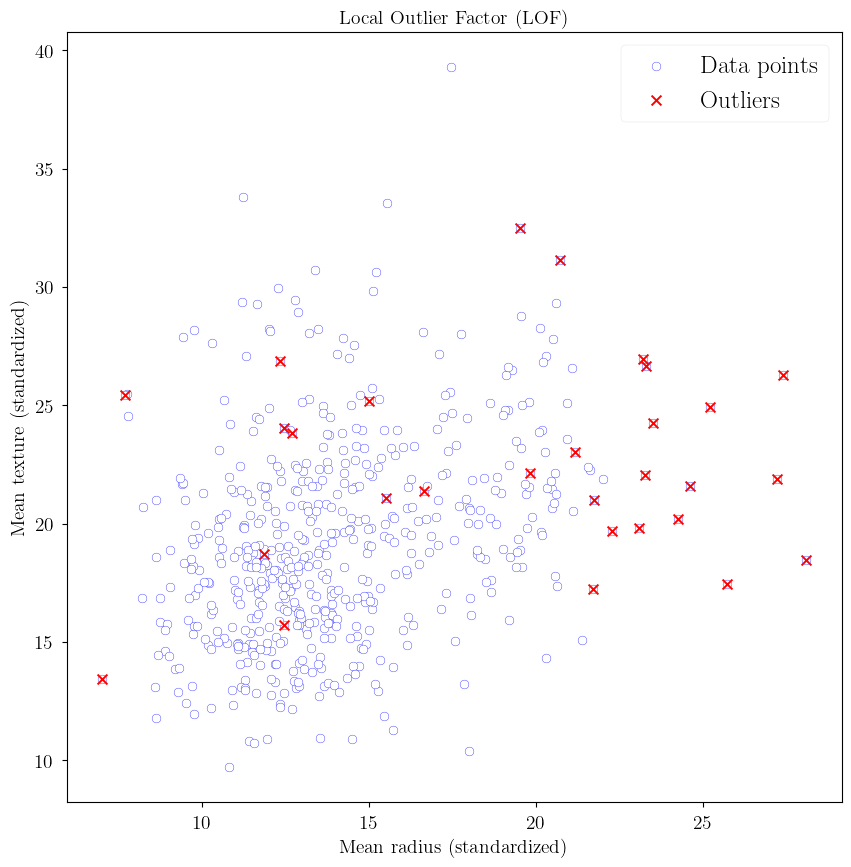

In [9]:
# Plot
plt.subplots(figsize=(10, 10))
plt.title('Local Outlier Factor (LOF)')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], edgecolors='blue', facecolors='white', s=40., label='Data points')
plt.scatter(X.iloc[index_of_outliers, 0], X.iloc[index_of_outliers, 1], edgecolors='red', facecolors='red', s=50,
            marker='x',
            label='Outliers')
radius = (scores.max() - scores) / (scores.max() - scores.min())
#plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=1000 * radius, edgecolors='blue', facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlabel('Mean radius (standardized)')
plt.ylabel('Mean texture (standardized)')
plt.legend()
plt.savefig('../plots/lof.png')
plt.show()

In [10]:
X_new = X.drop(index_of_outliers, axis=0)
y_new = y.drop(index_of_outliers, axis=0)

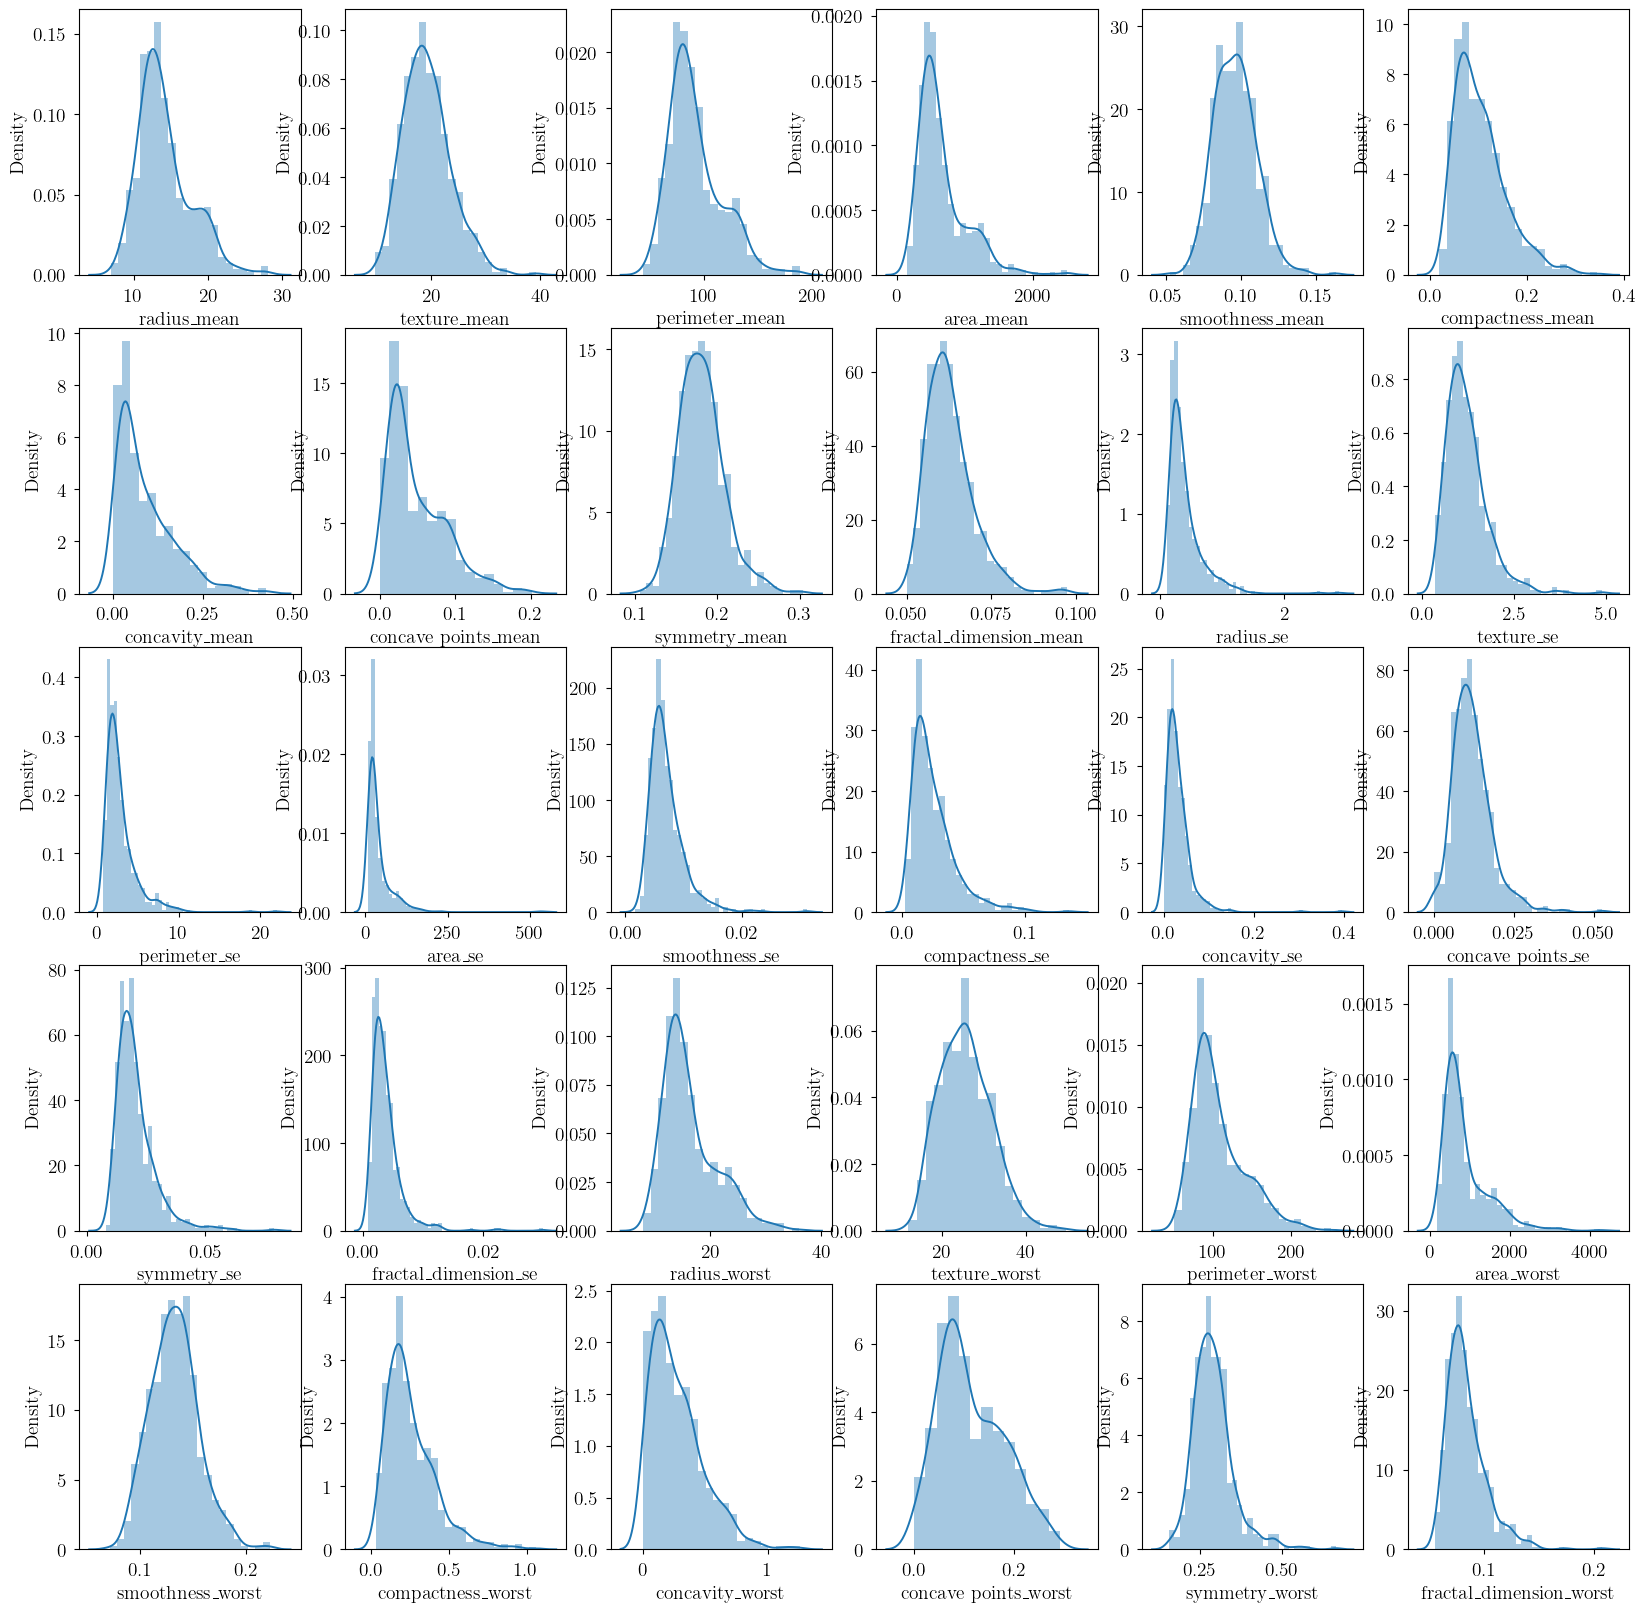

In [11]:
fig, ax = plt.subplots(5, 6, figsize=(20, 20))
for variable, subplot in zip(X.columns, ax.flatten()):
    sns.distplot(X[variable], ax=subplot)
plt.savefig('../plots/distribution.png')
plt.show()

In [12]:
# Transformation to log_transformation :
# 'texture_mean', 'smoothness_mean', 'smoothness_worst'
# Transformation to cube root :
# 'compactness_worst', 'concavity_worst', 'texture_worst', 'smoothness_se', 'symmetry_mean', 'compactness_mean'
X_new = log_transformation(X_new, ['texture_mean', 'smoothness_mean', 'smoothness_worst'])
X_new = cube_root_transformation(X_new, ['compactness_worst',
                                         'concavity_worst',
                                         'texture_worst',
                                         'smoothness_se',
                                         'symmetry_mean',
                                         'compactness_mean'])

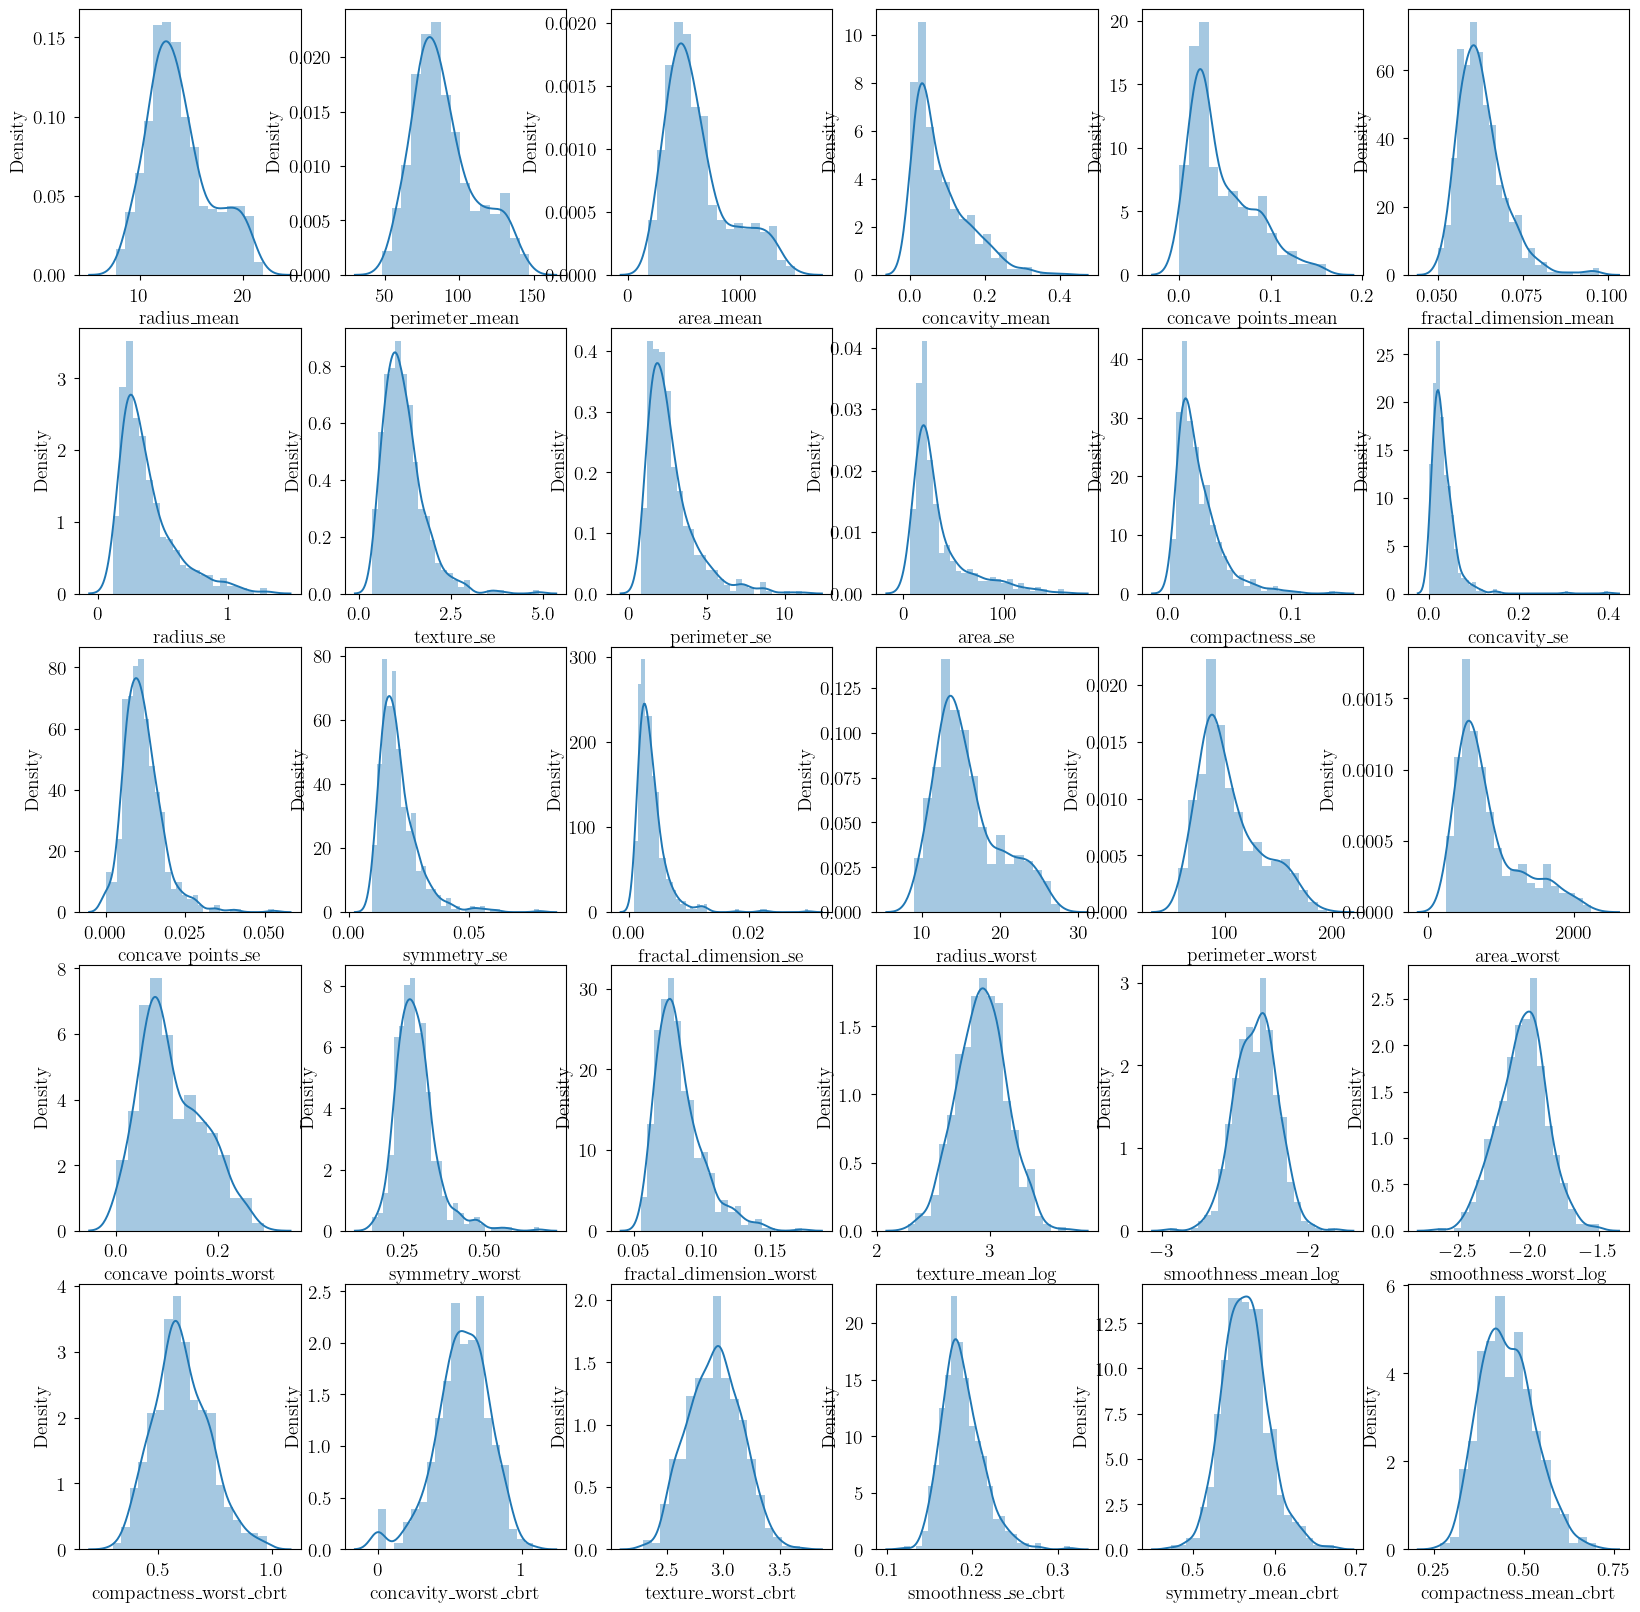

In [13]:
fig, ax = plt.subplots(5, 6, figsize=(20, 20))
for variable, subplot in zip(X_new.columns, ax.flatten()):
    sns.distplot(X_new[variable], ax=subplot)
plt.savefig('../plots/distribution_after_transformation.png')
plt.show()

In [14]:
print(check_normality(X_new))

                              p-value     normality
radius_mean              8.662121e-12  Not Gaussian
perimeter_mean           3.151737e-12  Not Gaussian
area_mean                5.312096e-18  Not Gaussian
concavity_mean           1.686860e-20  Not Gaussian
concave points_mean      2.699978e-18  Not Gaussian
fractal_dimension_mean   1.432384e-16  Not Gaussian
radius_se                4.486992e-22  Not Gaussian
texture_se               9.840859e-19  Not Gaussian
perimeter_se             1.244161e-23  Not Gaussian
area_se                  5.521120e-27  Not Gaussian
compactness_se           2.537075e-23  Not Gaussian
concavity_se             1.121238e-31  Not Gaussian
concave points_se        2.676115e-17  Not Gaussian
symmetry_se              9.734828e-24  Not Gaussian
fractal_dimension_se     1.661059e-30  Not Gaussian
radius_worst             3.822815e-15  Not Gaussian
perimeter_worst          7.101926e-15  Not Gaussian
area_worst               6.445533e-21  Not Gaussian
concave poin

In [15]:
# Gaussian list
gaussian_list = ['texture_mean_log', 'smoothness_mean_log', 'smoothness_worst_log', 'texture_worst_cbrt']
non_gaussian_list = X_new.columns.drop(gaussian_list)
print(non_gaussian_list)
print(gaussian_list)

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'fractal_dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst',
       'compactness_worst_cbrt', 'concavity_worst_cbrt', 'smoothness_se_cbrt',
       'symmetry_mean_cbrt', 'compactness_mean_cbrt'],
      dtype='object')
['texture_mean_log', 'smoothness_mean_log', 'smoothness_worst_log', 'texture_worst_cbrt']


In [16]:
X_new = standardize(X_new, gaussian_list)
X_new = normalize(X_new, non_gaussian_list)

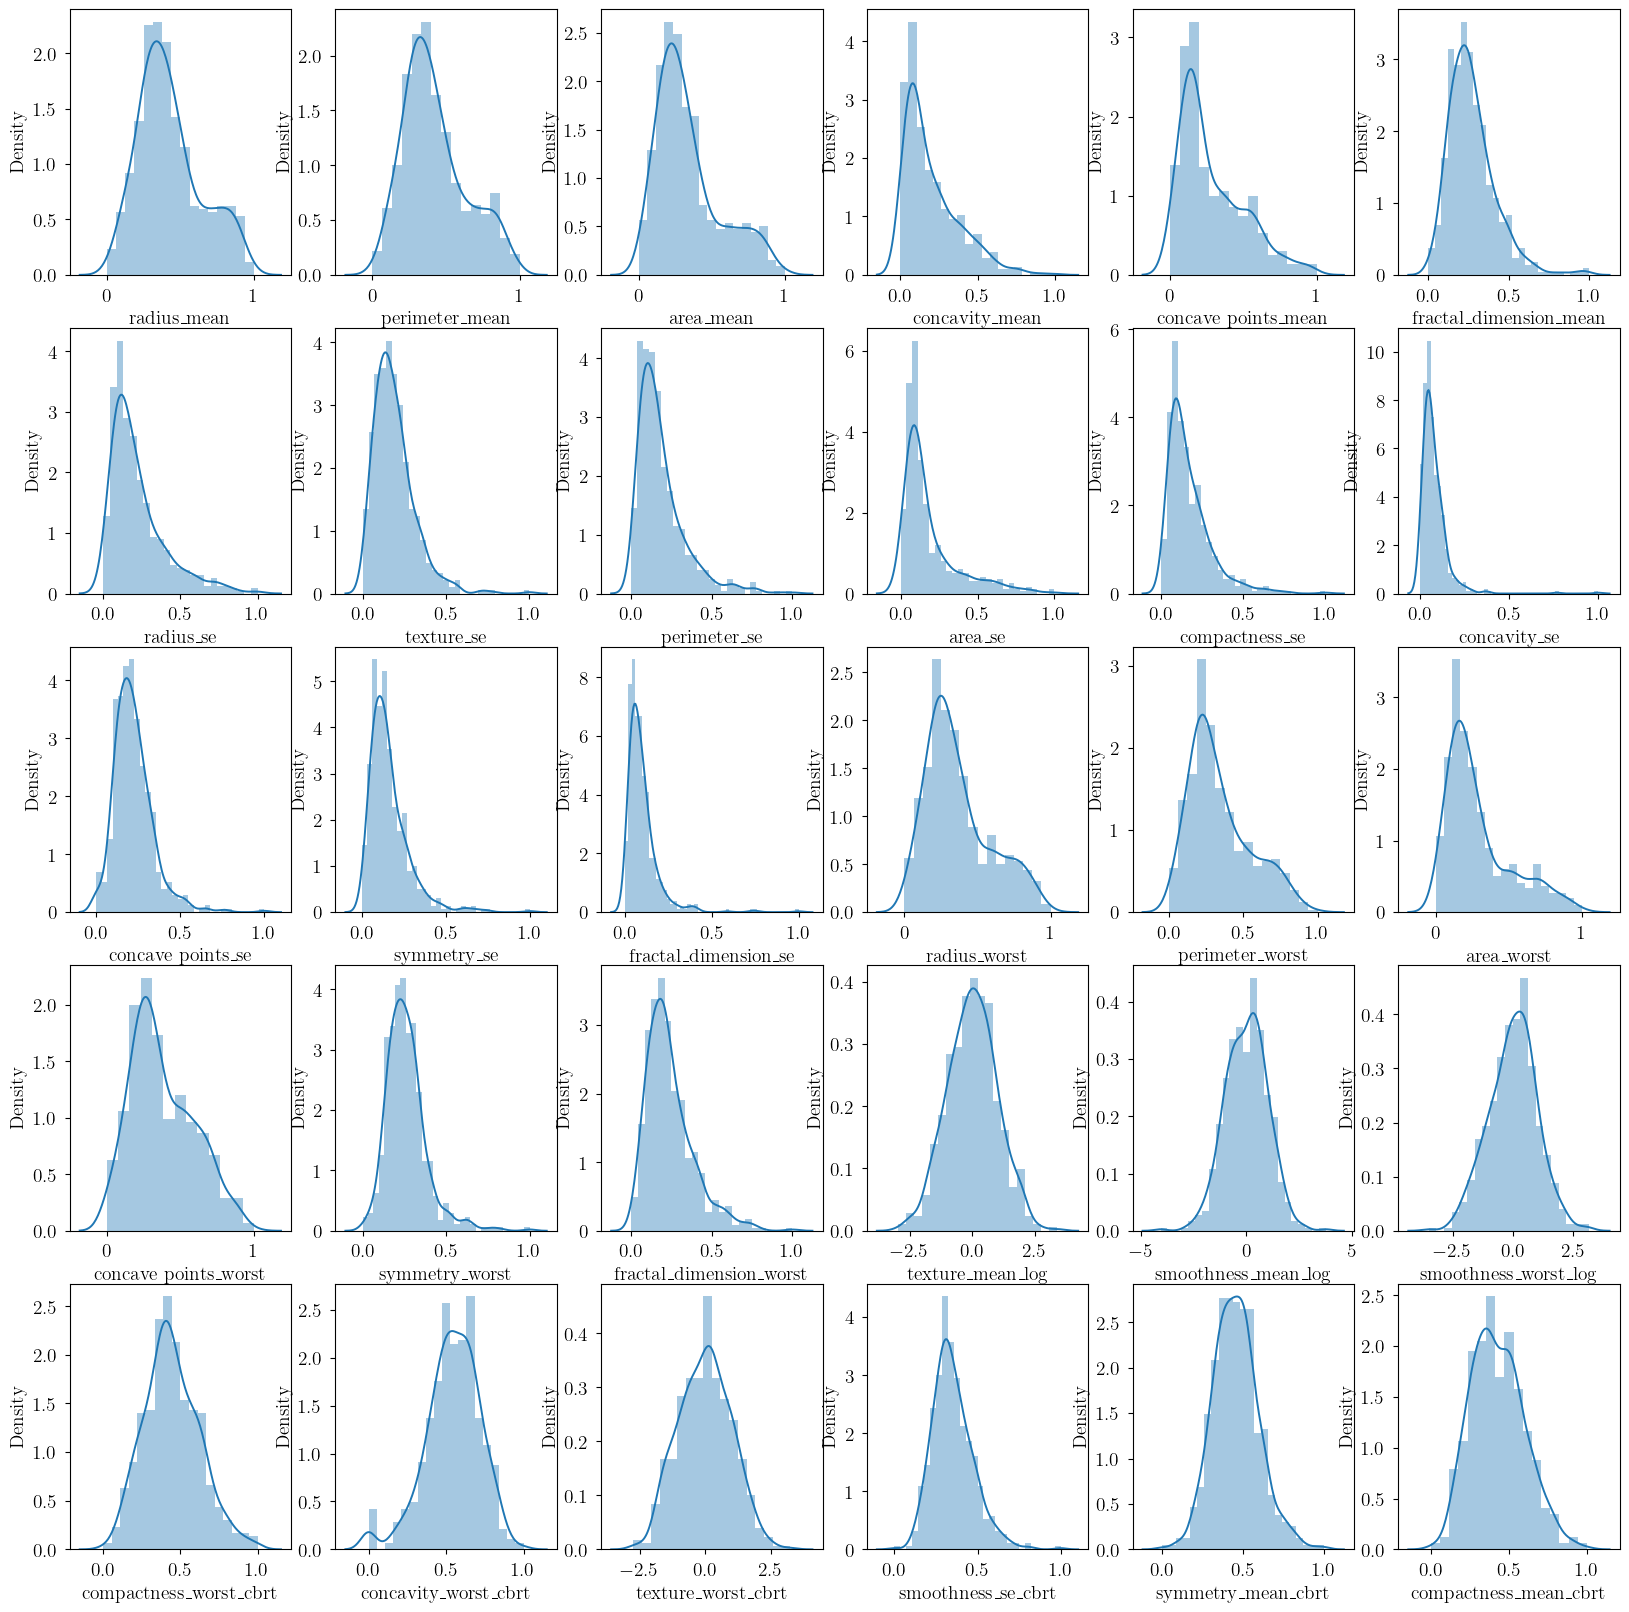

In [17]:
fig, ax = plt.subplots(5, 6, figsize=(20, 20))
for variable, subplot in zip(X_new.columns, ax.flatten()):
    sns.distplot(X_new[variable], ax=subplot)
plt.savefig('../plots/distribution_normalized_standardized.png')
plt.show()

In [18]:
def plot_distribution_before_after_transformation(col_before, col_after):
    '''
    :param col_before: column before transformation
    :param col_after: column after transformation
    :return: plot the change of distribution between before and after transformation
    '''
    import matplotlib.pyplot as plt
    import seaborn as sns
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.distplot(col_before, ax=ax, color='blue', label='Before')
    sns.distplot(col_after, ax=ax, color='red', label='After')
    plt.legend()
    plt.show()

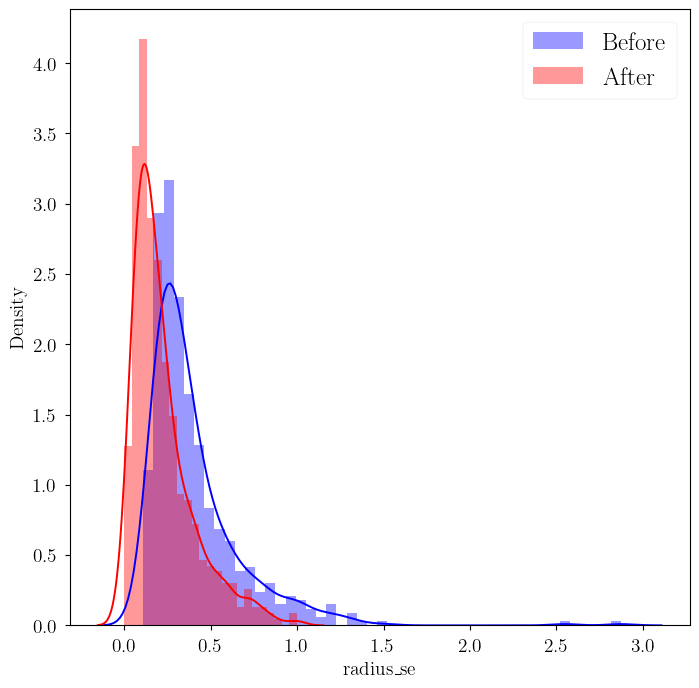

In [19]:
plot_distribution_before_after_transformation(X.radius_se, X_new.radius_se)

In [20]:
# Export the data to csv
X_new.to_csv('../dataset/breast-cancer-wisconsin-processed.csv', index=False)
y_new.to_csv('../dataset/breast-cancer-wisconsin-processed-label.csv', index=False)